1.1

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace = True)

# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy () # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered ['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[[ 'species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species', 'island', 'sex','class_encoded'] , axis = 1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
215,55.8,19.8,207.0,4000.0
216,43.5,18.1,202.0,3400.0
217,49.6,18.2,193.0,3775.0
218,50.8,19.0,210.0,4100.0


1.5

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression(solver ='saga')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( logreg.coef_ , logreg.intercept_ )


Accuracy : 0.5813953488372093
[[ 2.76395849e-03 -8.19594599e-05  4.44329288e-04 -2.85640402e-04]] [-8.56744095e-06]


c:\Users\Kehan Manamperi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.8

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

#Train the logistic regression model . Here we are using liblinear to learn weights .
logreg = LogisticRegression(solver ='liblinear')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( logreg.coef_ , logreg.intercept_ )


Accuracy : 1.0
[[ 1.5997544  -1.43222015 -0.15123497 -0.00401141]] [-0.07601213]


1.10.1 "saga" solver

In [7]:
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saga solver with scaling
logreg_saga_scaled = LogisticRegression(solver='saga')

logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)

print ("Accuracy saga scaled", accuracy_saga_scaled)
print ( logreg_saga_scaled.coef_ , logreg_saga_scaled.intercept_ )

Accuracy saga scaled 0.9767441860465116
[[ 3.90430194 -0.82344368  0.18546089 -0.73558974]] [-1.96730237]


1.10.2 "liblinear" solver

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg_liblinear_scaled = LogisticRegression(solver='liblinear')

logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)

print ("Accuracy liblinear scaled", accuracy_liblinear_scaled)
print ( logreg_liblinear_scaled.coef_ , logreg_liblinear_scaled.intercept_ )

Accuracy liblinear scaled 0.9767441860465116
[[ 3.77819685 -0.75341497  0.17248526 -0.71597049]] [-1.72205563]


1.11

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Prepare feature matrix X and target variable y
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)


ValueError: could not convert string to float: 'Dream'

1.11 Corrected Code

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Define feature columns and target
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded']  # Target variable

# Identify categorical and numerical columns
categorical_features = ['island', 'sex']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create a ColumnTransformer to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy variable trap
    ]
)

# Create a pipeline that first preprocesses the data and then applies Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))  # Increased max_iter for convergence
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# To access coefficients and intercept, you need to retrieve the classifier from the pipeline
logreg = pipeline.named_steps['classifier']
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 0.5813953488372093
Coefficients: [[ 0.02592071 -0.00107233  0.00116362 -0.00057946  0.0017884  -0.00102663
   0.00013563]]
Intercept: [-0.00010196]


c:\Users\Kehan Manamperi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


2.1

In [44]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [3]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


2.2

                      Ash  Magnesium  Flavanoids  Proanthocyanins   Proline  \
Ash              1.000000   0.286587    0.115077         0.009652  0.223626   
Magnesium        0.286587   1.000000    0.195784         0.236441  0.393351   
Flavanoids       0.115077   0.195784    1.000000         0.652692  0.494193   
Proanthocyanins  0.009652   0.236441    0.652692         1.000000  0.330417   
Proline          0.223626   0.393351    0.494193         0.330417  1.000000   
class           -0.049643  -0.209179   -0.847498        -0.499130 -0.633717   

                    class  
Ash             -0.049643  
Magnesium       -0.209179  
Flavanoids      -0.847498  
Proanthocyanins -0.499130  
Proline         -0.633717  
class            1.000000  


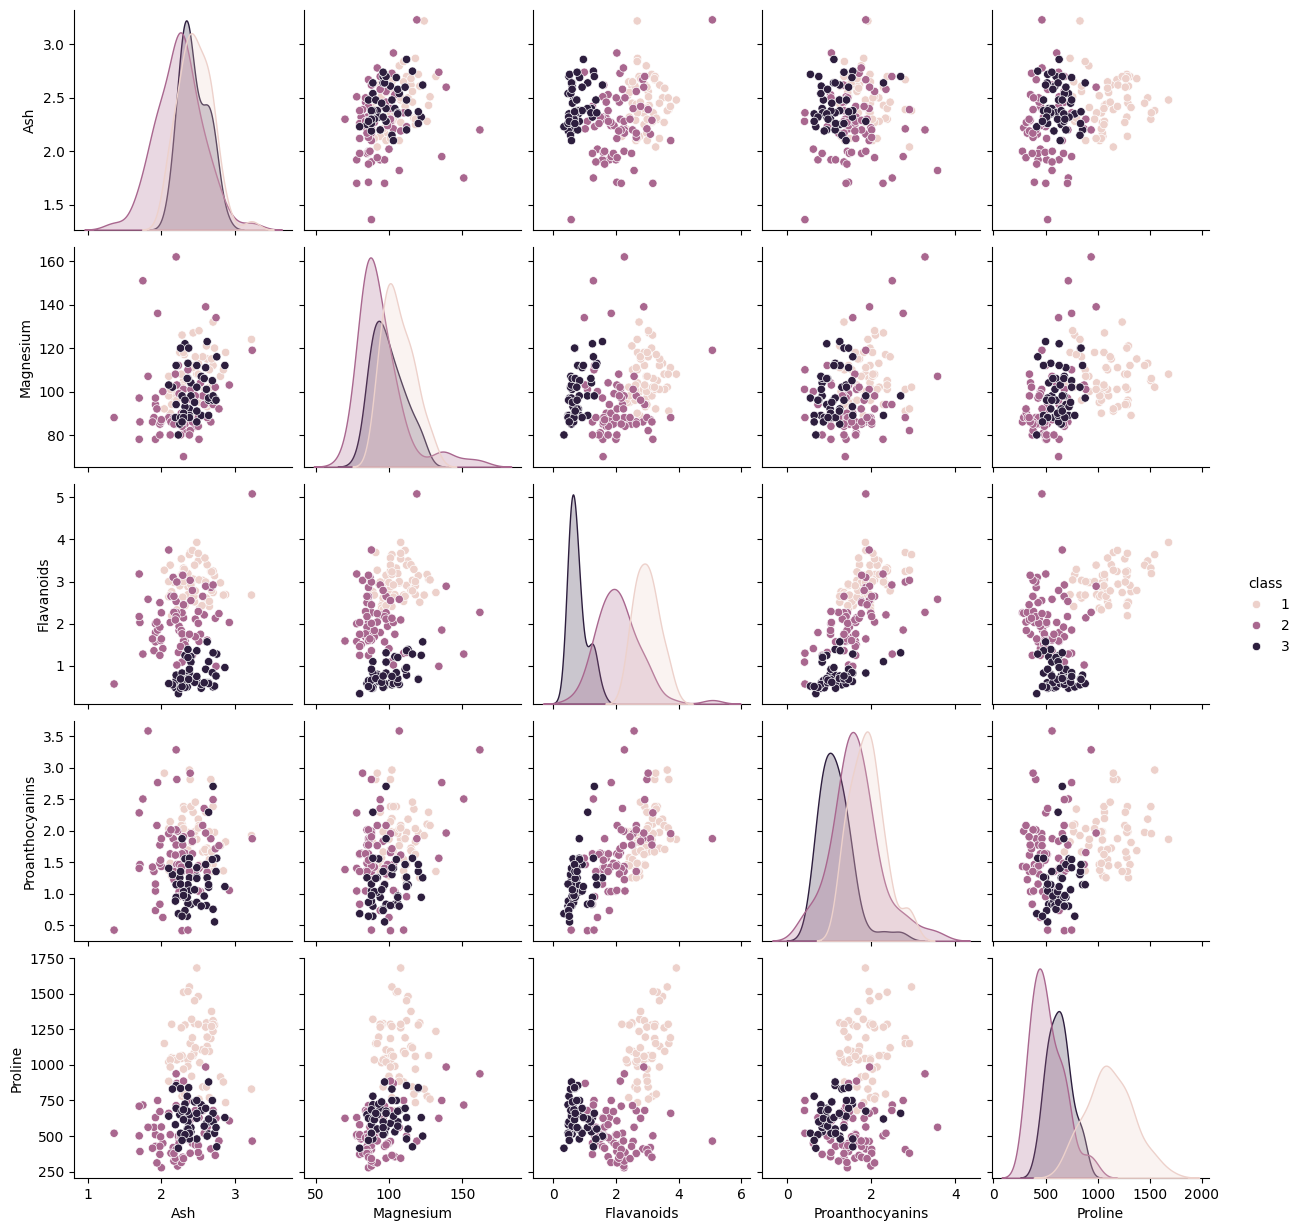

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
wine = fetch_ucirepo(id=109)

# Data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# Analysis with selected features
selected_features = ['Ash', 'Magnesium', 'Flavanoids', 'Proanthocyanins', 'Proline']
X_selected = X[selected_features]
df = pd.concat([X_selected, y], axis=1)
df.dropna()

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Pairplot
sns.pairplot(data=df, diag_kind='kde', hue='class')  # 'class' assumes target variable name
plt.show()


2.3

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Use selected features
X = df[selected_features].copy()
y = df[['class']]  # Assuming 'class' is the target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Initialize Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.8055555555555556

Confusion Matrix:
 [[11  2  0]
 [ 2 11  2]
 [ 0  1  7]]
Precision: 0.8057760141093474
Recall: 0.8055555555555556
F1-Score: 0.8046540455262564


c:\Users\Kehan Manamperi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kehan Manamperi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Kehan Manamperi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

Confusion Matrix

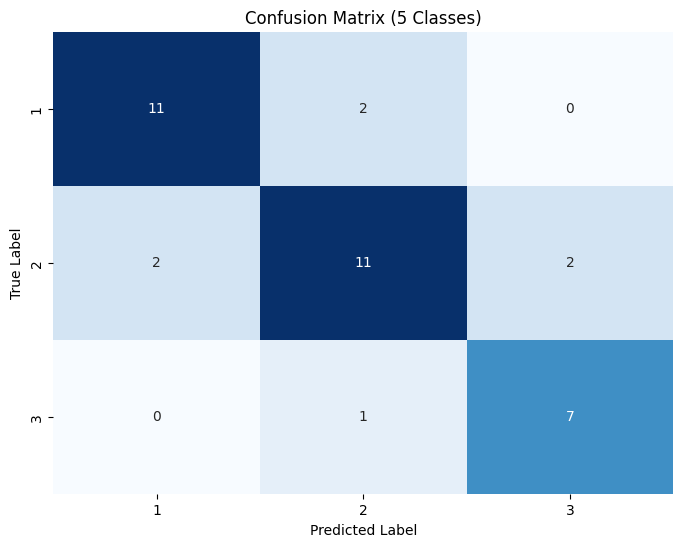

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (5 Classes)')
plt.show()


2.4


In [59]:
import statsmodels.api as sm

X = sm.add_constant(X)

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Fit the multinomial logistic regression model using statsmodels' MNLogit function
mnlogit_model = sm.MNLogit(y_train, X_train)
result = mnlogit_model.fit()

# Print the summary of the model, including p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.165288
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                  class   No. Observations:                  142
Model:                        MNLogit   Df Residuals:                      130
Method:                           MLE   Df Model:                           10
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.8482
Time:                        00:39:55   Log-Likelihood:                -23.471
converged:                       True   LL-Null:                       -154.64
Covariance Type:            nonrobust   LLR p-value:                 1.382e-50
        class=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.6895      5.968      2.796      0.005       4.992      28.387
Ash          

3.1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs( n_samples =2000 , centers = centers , random_state = 5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np.dot(X , transformation)

In [24]:
y

array([0, 1, 1, ..., 0, 1, 1])

In [23]:
X

array([[-2.19655439, -6.04817613],
       [ 0.81789766,  4.8792503 ],
       [ 2.8314302 ,  5.80299161],
       ...,
       [-3.26670243, -2.62516778],
       [ 2.23050411,  4.08324346],
       [ 0.81695873,  4.89150137]])

3.2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



# Add bias term to the dataset (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def binary_cross_entropy(y_true, y_pred):


    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Batch Gradient Descent function
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):


    weights = np.random.randn(X.shape[1])  # Initialize weights randomly



    batch_losses = []



    
    for i in range(iterations):
        # Forward pass: prediction using the sigmoid function
        z = X.dot(weights)
        predictions = sigmoid(z)
        
        # Compute the error
        error = predictions - y
        
        # Compute the gradient
        gradient = X.T.dot(error) / X.shape[0]
        
        # Update the weights
        weights -= learning_rate * gradient
        
        # Compute the loss (binary cross-entropy)
        loss = binary_cross_entropy(y, predictions)
        batch_losses.append(loss)
        
        # Print the loss for every iteration
        print(f"Iteration {i+1}/{iterations}, Loss: {loss}")
    
    return weights, batch_losses

# Initialize parameters and run the gradient descent algorithm
learning_rate = 0.01
iterations = 20
weights, batch_losses = batch_gradient_descent(X, y, learning_rate, iterations)



Iteration 1/20, Loss: 0.1558331393474245
Iteration 2/20, Loss: 0.15457517140969118
Iteration 3/20, Loss: 0.15333546064175643
Iteration 4/20, Loss: 0.1521136358359516
Iteration 5/20, Loss: 0.1509093353480848
Iteration 6/20, Loss: 0.1497222068025615
Iteration 7/20, Loss: 0.1485519068079741
Iteration 8/20, Loss: 0.14739810068274511
Iteration 9/20, Loss: 0.1462604621904265
Iteration 10/20, Loss: 0.14513867328427527
Iteration 11/20, Loss: 0.14403242386074075
Iteration 12/20, Loss: 0.1429414115215155
Iteration 13/20, Loss: 0.14186534134381645
Iteration 14/20, Loss: 0.1408039256585769
Iteration 15/20, Loss: 0.1397568838362432
Iteration 16/20, Loss: 0.13872394207988417
Iteration 17/20, Loss: 0.13770483322533203
Iteration 18/20, Loss: 0.13669929654808663
Iteration 19/20, Loss: 0.1357070775767255
Iteration 20/20, Loss: 0.134727927912573


3.4

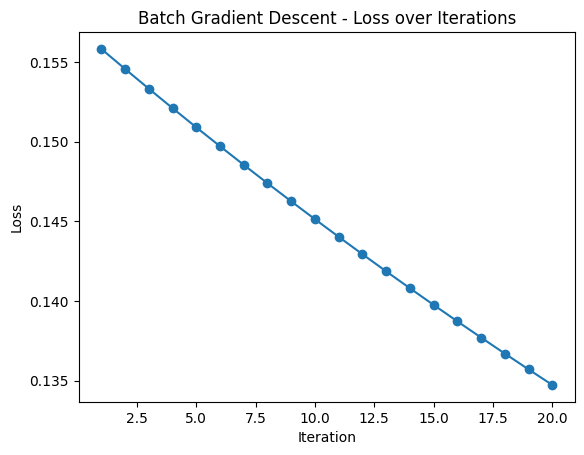

In [34]:
# Plot the loss over iterations
plt.plot(range(1, iterations+1), batch_losses ,marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent - Loss over Iterations')
plt.show()

3.5

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to the dataset (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Stochastic Gradient Descent implementation
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    m = X.shape[0]  # number of samples

    weights = np.random.randn(X.shape[1])  # Random initialization of weights

    
    loss_history_sgd = []
    
    for i in range(iterations):
        total_loss = 0
        for j in range(m):
            # Select one data point at a time (stochastic)
            X_j = X[j, :].reshape(1, -1)
            y_j = y[j]

            # Forward pass: prediction using the sigmoid function
            prediction = sigmoid(np.dot(X_j, weights))

            # Compute the error for the single data point
            error = prediction - y_j

            # Compute the loss (binary cross-entropy for this data point)
            loss = binary_cross_entropy(np.array([y_j]), np.array([prediction]))
            total_loss += loss

            # Compute the gradient
            gradient = X_j.T.dot(error)

            # Update the weights
            weights -= learning_rate * gradient.flatten()

        # Compute the average loss over all samples in the current iteration
        avg_loss = total_loss / m
        loss_history_sgd.append(avg_loss)

        # Print the loss at each iteration
        print(f"Iteration {i + 1}, Loss: {avg_loss}")

    return weights, loss_history_sgd

# Set parameters and run stochastic gradient descent
learning_rate = 0.01
iterations = 20
weights_sgd, loss_history_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)



Iteration 1, Loss: 0.025347769832191495
Iteration 2, Loss: 0.0056939358332481664
Iteration 3, Loss: 0.003508995624867277
Iteration 4, Loss: 0.00258276376208693
Iteration 5, Loss: 0.002062253502432157
Iteration 6, Loss: 0.0017261318368534755
Iteration 7, Loss: 0.0014900191906513716
Iteration 8, Loss: 0.0013144727458195972
Iteration 9, Loss: 0.001178499792350114
Iteration 10, Loss: 0.0010698649866616211
Iteration 11, Loss: 0.0009809394623330376
Iteration 12, Loss: 0.0009067115523273613
Iteration 13, Loss: 0.0008437487697259494
Iteration 14, Loss: 0.0007896186969640397
Iteration 15, Loss: 0.0007425479448493526
Iteration 16, Loss: 0.0007012121281290491
Iteration 17, Loss: 0.0006646015665128809
Iteration 18, Loss: 0.0006319326046535398
Iteration 19, Loss: 0.0006025874068293875
Iteration 20, Loss: 0.0005760720803455691


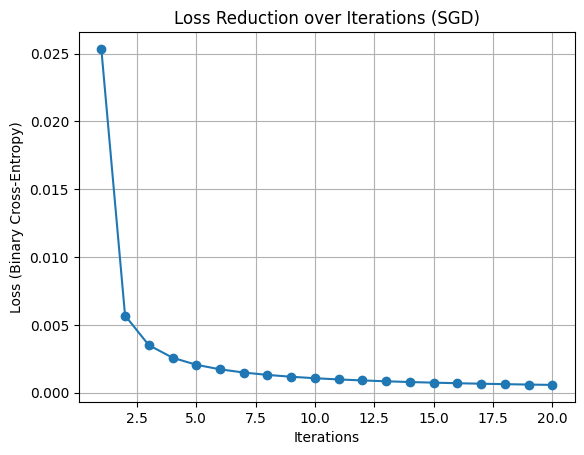

In [36]:
# Plot the loss vs iterations
plt.plot(range(1, iterations + 1), loss_history_sgd, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss Reduction over Iterations (SGD)')
plt.grid(True)
plt.show()

3.6

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to the dataset (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Newton's Method implementation
def newtons_method(X, y, iterations=20):
    weights = np.random.randn(X.shape[1])  # Random initialization of weights
    Newton_losses = []
    
    for i in range(iterations):
        # Forward pass: prediction using the sigmoid function
        z = X.dot(weights)
        predictions = sigmoid(z)

        # Compute the error
        error = predictions - y

        # Gradient: First derivative of the loss function
        gradient = X.T.dot(error) / X.shape[0]

        # Hessian: Second derivative of the loss function (approximation)
        S = np.diag(predictions * (1 - predictions))  # Diagonal matrix of sigmoid derivatives
        hessian = X.T.dot(S).dot(X) / X.shape[0]

        # Update the weights using Newton's update rule
        weights -= np.linalg.inv(hessian).dot(gradient)

        # Compute the loss (binary cross-entropy)
        loss = binary_cross_entropy(y, predictions)
        Newton_losses.append(loss)

        # Print the loss at each iteration
        print(f"Iteration {i + 1}/{iterations}, Loss: {loss}")

    return weights, Newton_losses

# Set parameters and run Newton's method
iterations = 20
weights_newton, loss_history_newton = newtons_method(X, y, iterations)




Iteration 1/20, Loss: 0.1558331393474245
Iteration 2/20, Loss: 0.03972760044344609
Iteration 3/20, Loss: 0.015047755815077484
Iteration 4/20, Loss: 0.00593222890577136
Iteration 5/20, Loss: 0.0023970659002949526
Iteration 6/20, Loss: 0.0009892698358771386
Iteration 7/20, Loss: 0.0004159165336728088
Iteration 8/20, Loss: 0.00017709226642053418
Iteration 9/20, Loss: 7.556629030762011e-05
Iteration 10/20, Loss: 3.188586407804284e-05
Iteration 11/20, Loss: 1.3151648938890353e-05
Iteration 12/20, Loss: 5.276033290829908e-06
Iteration 13/20, Loss: 2.0639266343102043e-06
Iteration 14/20, Loss: nan
Iteration 15/20, Loss: nan
Iteration 16/20, Loss: nan
Iteration 17/20, Loss: nan
Iteration 18/20, Loss: nan
Iteration 19/20, Loss: nan
Iteration 20/20, Loss: nan


C:\Users\Kehan Manamperi\AppData\Local\Temp\ipykernel_16956\1926211629.py:21: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Kehan Manamperi\AppData\Local\Temp\ipykernel_16956\1926211629.py:21: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


3.7

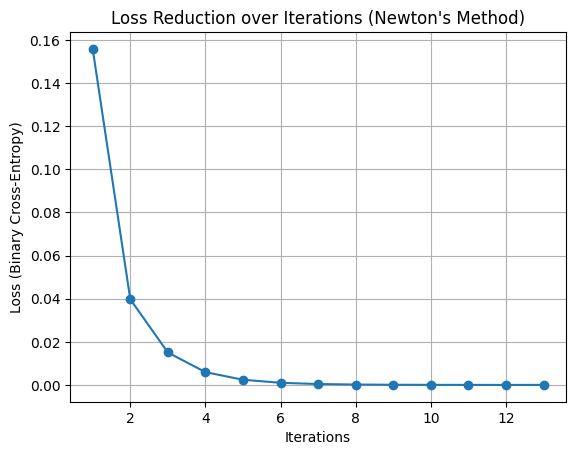

In [38]:
# Plot the loss vs iterations
plt.plot(range(1, iterations + 1), loss_history_newton, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss Reduction over Iterations (Newton\'s Method)')
plt.grid(True)
plt.show()

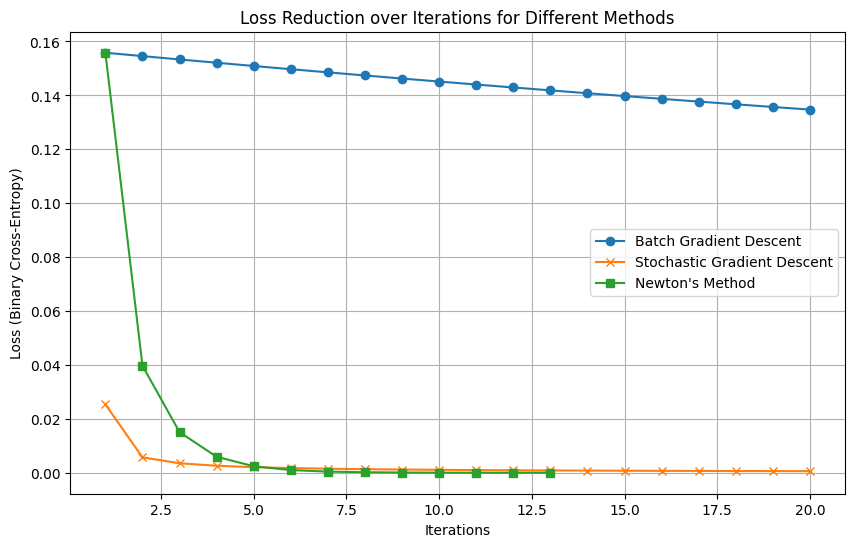

In [43]:
# Plotting the loss versus iterations for all methods
plt.figure(figsize=(10, 6))

# Plotting Batch Gradient Descent losses
plt.plot(range(1, iterations + 1), batch_losses, marker='o', label='Batch Gradient Descent')

# Plotting Stochastic Gradient Descent losses
plt.plot(range(1, iterations + 1), loss_history_sgd, marker='x', label='Stochastic Gradient Descent')

# Ensure loss_history_newton has the correct length
plt.plot(range(1, iterations + 1), loss_history_newton, marker='s', label="Newton's Method")

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss Reduction over Iterations for Different Methods')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


3.10

Iteration 1/20, Loss: 1.9541837814508949
Iteration 2/20, Loss: 1.9410796303771118
Iteration 3/20, Loss: 1.9279928856971473
Iteration 4/20, Loss: 1.9149240008571706
Iteration 5/20, Loss: 1.901873442566514
Iteration 6/20, Loss: 1.8888416912057138
Iteration 7/20, Loss: 1.8758292412461455
Iteration 8/20, Loss: 1.8628366016814144
Iteration 9/20, Loss: 1.8498642964706487
Iteration 10/20, Loss: 1.836912864993827
Iteration 11/20, Loss: 1.823982862519239
Iteration 12/20, Loss: 1.81107486068316
Iteration 13/20, Loss: 1.7981894479817897
Iteration 14/20, Loss: 1.7853272302754726
Iteration 15/20, Loss: 1.7724888313051692
Iteration 16/20, Loss: 1.7596748932211295
Iteration 17/20, Loss: 1.746886077123645
Iteration 18/20, Loss: 1.734123063615726
Iteration 19/20, Loss: 1.7213865533674817
Iteration 20/20, Loss: 1.7086772676919209


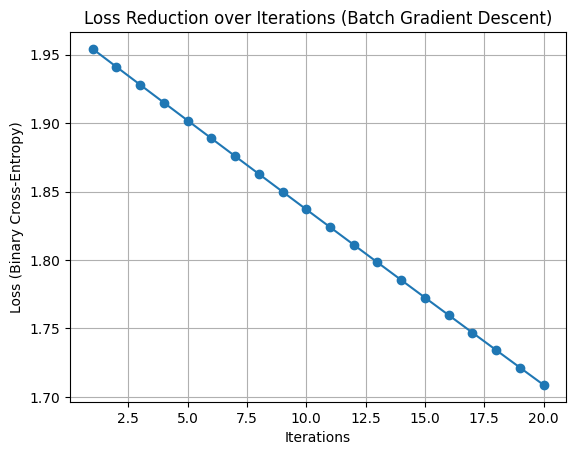

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with updated centers
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]  # Updated centers
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to the dataset (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Batch Gradient Descent function
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    weights = np.random.randn(X.shape[1])  # Initialize weights randomly
    batch_losses = []
    
    for i in range(iterations):
        # Forward pass: prediction using the sigmoid function
        z = X.dot(weights)
        predictions = sigmoid(z)
        
        # Compute the error
        error = predictions - y
        
        # Compute the gradient
        gradient = X.T.dot(error) / X.shape[0]
        
        # Update the weights
        weights -= learning_rate * gradient
        
        # Compute the loss (binary cross-entropy)
        loss = binary_cross_entropy(y, predictions)
        batch_losses.append(loss)
        
        # Print the loss for every iteration
        print(f"Iteration {i+1}/{iterations}, Loss: {loss}")
    
    return weights, batch_losses

# Initialize parameters and run the gradient descent algorithm
learning_rate = 0.01
iterations = 20
weights, batch_losses = batch_gradient_descent(X, y, learning_rate, iterations)

# Plot the loss over iterations
plt.plot(range(1, iterations + 1), batch_losses, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss Reduction over Iterations (Batch Gradient Descent)')
plt.grid(True)
plt.show()


Loss vs Iterations

Iteration 1/20, Loss: 0.1558331393474245
Iteration 2/20, Loss: 0.15457517140969118
Iteration 3/20, Loss: 0.15333546064175643
Iteration 4/20, Loss: 0.1521136358359516
Iteration 5/20, Loss: 0.1509093353480848
Iteration 6/20, Loss: 0.1497222068025615
Iteration 7/20, Loss: 0.1485519068079741
Iteration 8/20, Loss: 0.14739810068274511
Iteration 9/20, Loss: 0.1462604621904265
Iteration 10/20, Loss: 0.14513867328427527
Iteration 11/20, Loss: 0.14403242386074075
Iteration 12/20, Loss: 0.1429414115215155
Iteration 13/20, Loss: 0.14186534134381645
Iteration 14/20, Loss: 0.1408039256585769
Iteration 15/20, Loss: 0.1397568838362432
Iteration 16/20, Loss: 0.13872394207988417
Iteration 17/20, Loss: 0.13770483322533203
Iteration 18/20, Loss: 0.13669929654808663
Iteration 19/20, Loss: 0.1357070775767255
Iteration 20/20, Loss: 0.134727927912573
Iteration 1/20, Loss: 1.9541837814508949
Iteration 2/20, Loss: 1.9410796303771118
Iteration 3/20, Loss: 1.9279928856971473
Iteration 4/20, Loss: 1.91492400085717

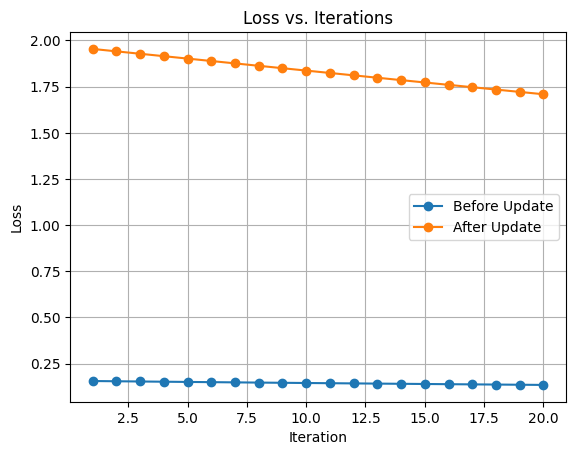

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Function to generate data and run Batch Gradient Descent
def run_gradient_descent(centers, learning_rate=0.01, iterations=20):
    # Generate synthetic data
    np.random.seed(0)
    X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
    transformation = [[0.5, 0.5], [-0.5, 1.5]]
    X = np.dot(X, transformation)

    # Add bias term to the dataset (column of ones)
    X = np.c_[np.ones(X.shape[0]), X]

    # Sigmoid function for logistic regression
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Loss function (binary cross-entropy)
    def binary_cross_entropy(y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Batch Gradient Descent function
    def batch_gradient_descent(X, y, learning_rate, iterations):
        weights = np.random.randn(X.shape[1])  # Initialize weights randomly
        batch_losses = []
        
        for i in range(iterations):
            z = X.dot(weights)
            predictions = sigmoid(z)
            error = predictions - y
            gradient = X.T.dot(error) / X.shape[0]
            weights -= learning_rate * gradient
            loss = binary_cross_entropy(y, predictions)
            batch_losses.append(loss)
            print(f"Iteration {i+1}/{iterations}, Loss: {loss}")

        return batch_losses

    # Run the gradient descent algorithm and return the losses
    return batch_gradient_descent(X, y, learning_rate, iterations)

# Run Batch Gradient Descent before updating centers
centers_before = [[-5, 0], [5, 1.5]]
losses_bg = run_gradient_descent(centers_before)

# Run Batch Gradient Descent after updating centers
centers_after = [[3, 0], [5, 1.5]]  # Updated centers
losses_bg_updated = run_gradient_descent(centers_after)

# Plot the loss values
plt.plot(range(1, 21), losses_bg, label='Before Update', marker='o')
plt.plot(range(1, 21), losses_bg_updated, label='After Update', marker='o')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.legend()
plt.show()
